# Lecture 4.2: Multivariate regression
- Now that we have looked at how we can calculate a regression using a single independent variable we can move on to the more common multiple regression
- **If you have any questions over the course of this lecture, please post them to the 'Day 4 Lecture Questions' assignment on the Canvas course page.**

## Adding information to our data

- Today we will simply merge on some data about these facilities.
    - However, tomorrow, we will go into detail on using `Natural Language Toolkit` to classify information analyzing text which was how this information was derived.
- We will first add the type of facility and the demographics of the facility's zip code.
- The `facility_demos` file contains the following variables:
    - **population** = Total population in the zip code of the clinic.
    - **pct_middle_aged** = Percent of total population 45- 64 years in the zip code of the clinic.
    - **pct_senior** = Percent of total population 65 years and over in the zip code of the clinic.
    - **pct_male** = Percent male population in the zip code of the clinic.
    - **pct_white** = Percent white in the zip code of the clinic.
    - **pct_black** =  Percent black or African American in the zip code of the clinic.
    - **pct_non_rel** = Percent in households with nonrelatives in the zip code of the clinic.
    - **pct_vacant** = Percent vacant housing units in the zip code of the clinic.

In [11]:
#load in the relevant data
import pandas as pd
sleep = pd.read_csv('sleep.csv')
facility_type=pd.read_csv('facility_type.csv')
demos = pd.read_csv('facility_demos.csv')


In [12]:
sleep2 = pd.merge(sleep,facility_type)
sleep2

,price,facility,address,condition,zip,radius,city,facility_type
0,650.0,iSleep Program,"1200 Waters Pl., Ste. 104, Bronx NY",sleep,10001,50,New York,clinic
1,650.0,iSleep Program,"1200 Waters Pl., Ste. 104, Bronx NY",sleep,10001,50,New York,clinic
2,350.0,iSleep Program,"1200 Waters Pl., Ste. 104, Bronx NY",sleep,10001,50,New York,clinic
3,350.0,iSleep Program,"1200 Waters Pl., Ste. 104, Bronx NY",sleep,10001,50,New York,clinic
4,700.0,New York Sleep Disorder Center,"2951 Grand Concourse Ste. IA, Bronx NY",sleep,10001,50,New York,hospital
...,...,...,...,...,...,...,...,...
132,3499.0,Texas Health Presbyterian Dallas,"8200 Walnut Hill Ln., Dallas TX",sleep,75001,50,Dallas,clinic
133,4965.0,Baylor Scott and White Carrollton,"4343 N. Josey Ln., Carrollton TX",sleep,75001,50,Dallas,clinic
134,4965.0,Sleep Study Center Baylor University Medical C...,"3600 Gaston Ave., Barnett Tower, Ste. 801, Dal...",sleep,75001,50,Dallas,clinic
135,4965.0,Baylor Scott and White All Saints,"1400 8th Ave., Fort Worth TX",sleep,75001,50,Dallas,clinic


In [13]:
sleep2 = sleep2[sleep2.price != 10000]
sleep2 = sleep2[sleep2.price != 13195]
sleep2 = sleep2[sleep2.price != 19440]

In [14]:
demos

,facility,population,pct_middle_aged,pct_senior,pct_male,pct_white,pct_black,pct_non_rel,pct_vacant
0,iSleep Program,50502,24.9,15.0,47.6,59.2,8.6,4.9,6.4
1,New York Sleep Disorder Center,76103,22.4,8.5,47.2,24.8,25.9,7.5,4.8
2,Sleep Diagnostics of NY,68733,28.0,18.6,46.2,65.4,2.9,4.4,6.0
3,Hackensack Sleep and Pulmonary Center,43010,26.1,12.4,49.5,46.7,24.4,7.1,6.4
4,RWJBarnabas Health - Physician Enterprise Slee...,46298,32.0,13.4,48.3,69.0,4.1,2.2,3.3
...,...,...,...,...,...,...,...,...,...
102,Texas Health Presbyterian Dallas,37052,18.6,6.3,52.0,44.9,22.2,7.1,17.5
103,Baylor Scott and White Carrollton,21607,25.5,6.4,47.5,57.2,11.2,3.7,5.6
104,Sleep Study Center Baylor University Medical C...,2770,20.6,9.2,53.4,51.2,16.8,9.8,14.9
105,Baylor Scott and White All Saints,17446,23.6,11.4,50.1,30.2,47.1,6.3,16.6


In [15]:
sleep2 = pd.merge(sleep2, demos)
sleep2

,price,facility,address,condition,zip,radius,city,facility_type,population,pct_middle_aged,pct_senior,pct_male,pct_white,pct_black,pct_non_rel,pct_vacant
0,650.0,iSleep Program,"1200 Waters Pl., Ste. 104, Bronx NY",sleep,10001,50,New York,clinic,50502,24.9,15.0,47.6,59.2,8.6,4.9,6.4
1,650.0,iSleep Program,"1200 Waters Pl., Ste. 104, Bronx NY",sleep,10001,50,New York,clinic,50502,24.9,15.0,47.6,59.2,8.6,4.9,6.4
2,650.0,iSleep Program,"1200 Waters Pl., Ste. 104, Bronx NY",sleep,10001,50,New York,clinic,50502,24.9,15.0,47.6,59.2,8.6,4.9,6.4
3,650.0,iSleep Program,"1200 Waters Pl., Ste. 104, Bronx NY",sleep,10001,50,New York,clinic,50502,24.9,15.0,47.6,59.2,8.6,4.9,6.4
4,350.0,iSleep Program,"1200 Waters Pl., Ste. 104, Bronx NY",sleep,10001,50,New York,clinic,50502,24.9,15.0,47.6,59.2,8.6,4.9,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,3499.0,Texas Health Presbyterian Dallas,"8200 Walnut Hill Ln., Dallas TX",sleep,75001,50,Dallas,clinic,37052,18.6,6.3,52.0,44.9,22.2,7.1,17.5
202,4965.0,Baylor Scott and White Carrollton,"4343 N. Josey Ln., Carrollton TX",sleep,75001,50,Dallas,clinic,21607,25.5,6.4,47.5,57.2,11.2,3.7,5.6
203,4965.0,Sleep Study Center Baylor University Medical C...,"3600 Gaston Ave., Barnett Tower, Ste. 801, Dal...",sleep,75001,50,Dallas,clinic,2770,20.6,9.2,53.4,51.2,16.8,9.8,14.9
204,4965.0,Baylor Scott and White All Saints,"1400 8th Ave., Fort Worth TX",sleep,75001,50,Dallas,clinic,17446,23.6,11.4,50.1,30.2,47.1,6.3,16.6


# Exploring our new additions
- So let's see how many clinics vs. hospitals are in the data.
- How do the prices compare?

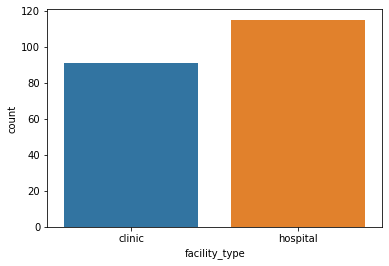

In [16]:
# looking at the number of clinics vs hospitals in our data
import seaborn as sns
sns.countplot(data=sleep2, x='facility_type')

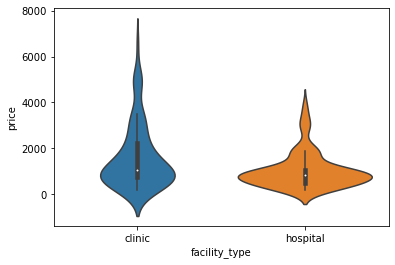

In [17]:
# looking at the price of clinics vs. hospitals
sns.violinplot(data=sleep2, y='price', x='facility_type')

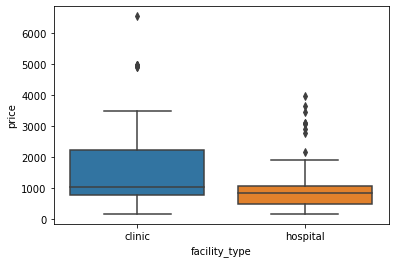

In [18]:
# why box plots are not always ideal
sns.boxplot(data=sleep2, y='price', x='facility_type')

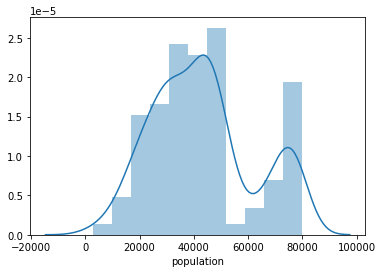

In [19]:
# lets look at our distribution of populations by zip code of facility
sns.distplot(sleep2['population'])

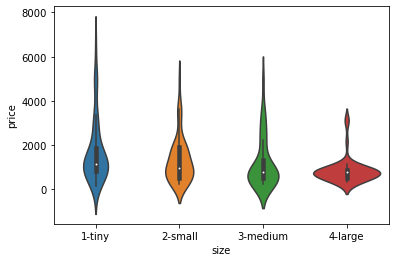

In [20]:
# make a variable cuts up population into quantiles
sleep2['size'] = pd.qcut(sleep2['population'],4,labels=['1-tiny','2-small','3-medium','4-large'])
sns.violinplot(data=sleep2, x='size', y='price')

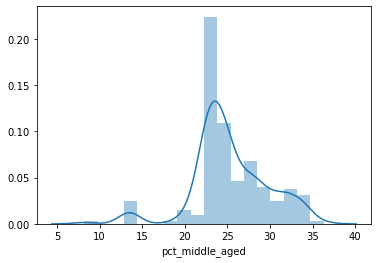

In [21]:
sns.distplot(sleep2['pct_middle_aged'])

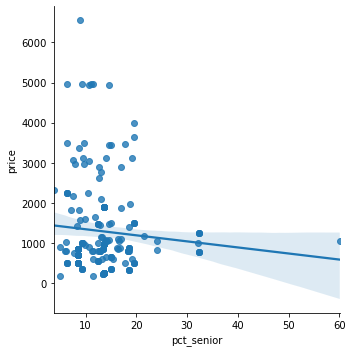

In [22]:
# Regressing with a single variable with interval data

sns.lmplot(data=sleep2, x='pct_senior', y='price')

In [23]:
# Multiple regression

In [24]:
# pip install this package
import statsmodels.formula.api as smf

import numpy as np


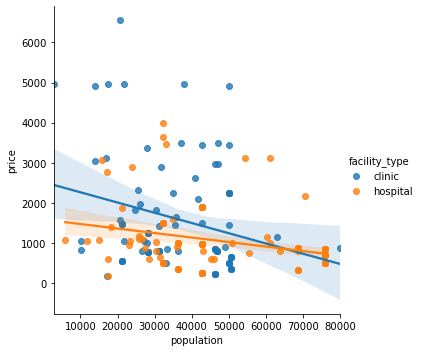

In [25]:
# lets compare the price relative to the populations size while comparing the facility type
sns.lmplot(data=sleep2, x='population', y='price', hue='facility_type')

In [26]:
#We can do a linear regression with C() denoting that our data is categorical
lm = smf.ols("price ~ C(city, Treatment(reference='New York'))+ size + C(facility_type)+pct_middle_aged+pct_senior+pct_male+pct_white+pct_black+pct_non_rel+pct_vacant", data = sleep2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     4.855
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           1.21e-07
Time:                        14:45:00   Log-Likelihood:                -1704.6
No. Observations:                 206   AIC:                             3439.
Df Residuals:                     191   BIC:                             3489.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                  4516.4642   3072.876      1.470      0.143   -1544.667    1.06e+04
C(city, Treatment(reference='New York'))[T.Dallas]          556.5274    304.118      1.830      0.069     -43.334    1156.389
C(city, Treatment(reference='New York'))[T.Miami]           293.3214    277.495      1.057      0.292    -254.026     840.669
C(city, Treatment(reference='New York'))[T.San Francisco]  1337.5308    325.441      4.110      0.000     695.610    1979.451
size[T.2-small]                                            -167.5764    235.269     -0.712      0.477    -631.637     296.484
size[T.3-medium]                                           -547.6110    260.955     -2.098      0.037   -1062.335     -32.887
size[T.4-large]                                            -349.1545    313.151     -1.115      0.266    -966.832     268.524
C(facility_type)[T.hospital]                               -409.4409    194.137     -2.109      0.036    -792.369     -26.513
pct_middle_aged                                             -70.1924     29.997     -2.340      0.020    -129.360     -11.025
pct_senior                                                  -42.7184     24.948     -1.712      0.088     -91.928       6.491
pct_male                                                    -28.5270     55.670     -0.512      0.609    -138.333      81.279
pct_white                                                    13.5346      8.915      1.518      0.131      -4.049      31.119
pct_black                                                    10.8670     13.542      0.802      0.423     -15.843      37.577
pct_non_rel                                                 -62.5390     41.005     -1.525      0.129    -143.420      18.342
pct_vacant                                                   26.1799     23.125      1.132      0.259     -19.434      71.794
==============================================================================
Omnibus:                       50.694   Durbin-Watson:                   0.594
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.241
Skew:                           1.155   Prob(JB):                     5.16e-24
Kurtosis:                       5.675   Cond. No.                     3.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
sleep2.pct_vacant


0       6.4
1       6.4
2       6.4
3       6.4
4       6.4
       ... 
201    17.5
202     5.6
203    14.9
204    16.6
205     8.5
Name: pct_vacant, Length: 206, dtype: float64

In [28]:
list(sleep2.columns)

['price',
 'facility',
 'address',
 'condition',
 'zip',
 'radius',
 'city',
 'facility_type',
 'population',
 'pct_middle_aged',
 'pct_senior',
 'pct_male',
 'pct_white',
 'pct_black',
 'pct_non_rel',
 'pct_vacant',
 'size']

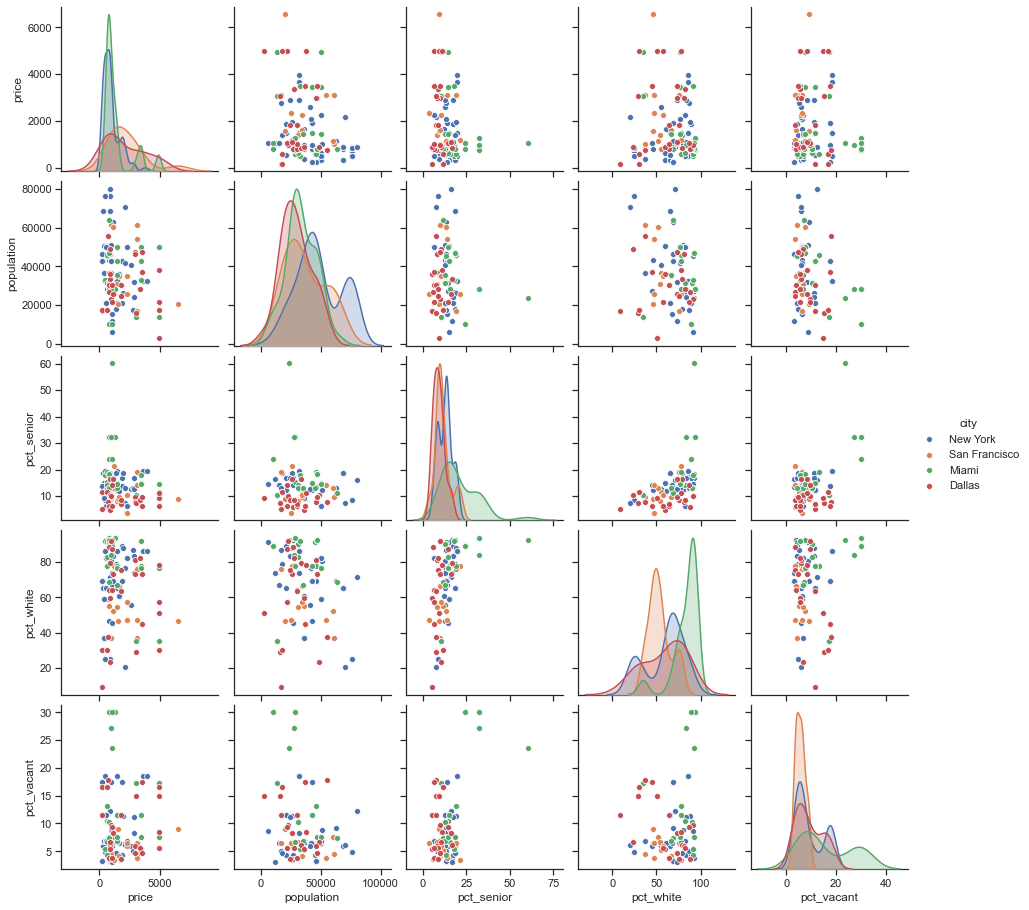

In [29]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(sleep2[['price','city','population','facility_type','pct_senior','pct_white','pct_vacant']], hue="city")
